In [1]:
import sys
import numpy as np
import tensorflow as tf
#import matplotlib.pyplot as plt
# Generacion del grafico de metricas de Perdidas y Accuracy
import pandas as pd
import matplotlib.pyplot as plt
#ML
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout, Dense
from keras.applications import *
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as k
from keras.models import Model

Using TensorFlow backend.


In [2]:
# fix seed for reproducible results (only works on CPU, not GPU)
#seed = 9
#np.random.seed(seed=seed)
#tf.set_random_seed(seed=seed)

# parameters dependent on your dataset: modified to your example
nb_train_samples = 690  # Total number of train samples. NOT including augmented images
nb_validation_samples = 346  # Total number of train samples. NOT including augmented images.
img_width, img_height = 299, 299  # change based on the shape/structure of your images

# hyper parameters for model
based_model_last_block_layer_number = 172  # value is based on based model selected.
batch_size = 64#8  # try 4, 8, 16, 32, 64, 128, 256 dependent on CPU/GPU memory capacity (powers of 2 values).
nb_epoch = 100#100  # number of iteration the algorithm gets trained.
learn_rate = 1e-4  # sgd learning rate
momentum = .9  # sgd momentum to avoid local minimum

#Dataset 1
data_dir = './data/DDSM Images'
#data_dir = './data/DM images'
train_dir = data_dir + '/train'  # change to your train path. Inside, each class should have it's own folder
validation_dir = data_dir + '/validation'  # validation path. Inside, each class should have it's own folder

Found 690 images belonging to 2 classes.


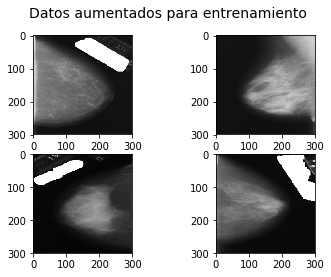

Found 346 images belonging to 2 classes.


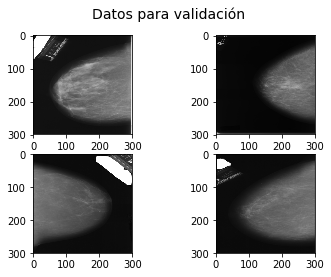

ResourceExhaustedError: OOM when allocating tensor with shape[64,149,149,32]
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_input_1_0_3/_2281, conv2d_1/kernel/read)]]
	 [[Node: loss/mul/_2287 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5180_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'conv2d_1/convolution', defined at:
  File "/home/grupoavatar/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/grupoavatar/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-2f5b428bcd20>", line 181, in <module>
    base_model = load_base_model1()
  File "<ipython-input-3-2f5b428bcd20>", line 3, in load_base_model1
    base_model = InceptionV3(weights='imagenet', include_top=False)  # select from keras pre-built models library
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/keras/applications/inception_v3.py", line 171, in InceptionV3
    x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding='valid')
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/keras/applications/inception_v3.py", line 79, in conv2d_bn
    name=conv_name)(x)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/keras/engine/topology.py", line 603, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/keras/layers/convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 3185, in conv2d
    data_format=tf_data_format)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 751, in convolution
    return op(input, filter)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 835, in __call__
    return self.conv_op(inp, filter)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 499, in __call__
    return self.call(inp, filter)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/ops/nn_ops.py", line 187, in __call__
    name=self.name)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, name=name)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/grupoavatar/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[64,149,149,32]
	 [[Node: conv2d_1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[1, 2, 2, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_input_1_0_3/_2281, conv2d_1/kernel/read)]]
	 [[Node: loss/mul/_2287 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_5180_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [3]:
def load_base_model1():
    # Pre-Trained CNN Model using imagenet dataset for pre-trained weights
    base_model = InceptionV3(weights='imagenet', include_top=False)  # select from keras pre-built models library

    return base_model

def build_predictions1(base_model):
    # Top Model Block
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)  # softmax if multi-class classifiers
    #predictions = Dense(nb_classes, activation='softmax')(x) #new softmax layer
    
    return predictions

def build_predictions2(base_model):
    # Top Model Block
    x = base_model.layers[-1].output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)  # softmax if multi-class classifiers
    #predictions = Dense(nb_classes, activation='softmax')(x) #new softmax layer
    
    return predictions

def train(model, train_data_dir, validation_data_dir):
    
    #print('Base model')
    #base_model.summary()
    
    #model.summary()
    
    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolution layers
    for layer in base_model.layers:
        layer.trainable = False

    # Read Data and Augment it: Make sure to select augmentations that are appropriate to your images.
    # To save augmentations un-comment save lines and add to your flow parameters.
    train_datagen = ImageDataGenerator(rescale=1. / 255,
                                       #rotation_range=10,
                                       shear_range=.1,
                                       zoom_range=.1,
                                       cval=.1,
                                       horizontal_flip=True)
                                       #vertical_flip=True)

    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='binary')
                                                        #save_to_dir=data_dir + '/preview',
                                                        #save_prefix='aug')#,
                                                        #save_format='jpeg')
    # use the above 3 commented lines if you want to save and look at how the data augmentations look like
    
    fig = plt.figure()
    fig.suptitle("Datos aumentados para entrenamiento", fontsize=14)
    x,y = train_generator.next()
    for i in range(0,4):
        image = x[i]
        #plt.imshow(image.transpose(2,1,0))
        #Plotea data aumentada
        ax1 = fig.add_subplot(2,2,i+1)
        ax1.imshow(image)
        #ax1.set_title("Clase %s"%y)
        #plt.show()
        #plt.imshow(image)
    
    plt.show()

    validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                            target_size=(img_height, img_width),
                                                            batch_size=batch_size,
                                                            class_mode='binary')

    fig = plt.figure()
    fig.suptitle("Datos para validación", fontsize=14)
    x,y = validation_generator.next()
    for i in range(0,4):
        image = x[i]
        #plt.imshow(image.transpose(2,1,0))
        #Plotea data aumentada
        ax1 = fig.add_subplot(2,2,i+1)
        ax1.imshow(image)
        #ax1.set_title("Clase %s"%y)
        #plt.show()
        #plt.imshow(image)
    
    plt.show()
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',  # categorical_crossentropy if multi-class classifier
                  metrics=['accuracy'])
    #  model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    
    path_dir = data_dir.split('/')
    name_dir = path_dir[len(path_dir)-1]+'_twice'
    
    # save weights of best training epoch: monitor either val_loss or val_acc
    top_weights_path = 'model/top_model_weights'+name_dir+'.h5'
    checkpoint = ModelCheckpoint(top_weights_path, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    #early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')
    callbacks_list = [checkpoint]    
    
    #Accuracy
    score = model.evaluate_generator(validation_generator, batch_size)
    print("Accuracy antes del transfer learning")
    print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    # Train Simple CNN
    history_tl = model.fit_generator(train_generator,
                        samples_per_epoch=nb_train_samples,
                        nb_epoch=nb_epoch / 5,
                        validation_data=validation_generator,
                        nb_val_samples=nb_validation_samples,
                        callbacks=callbacks_list)
    
    #Accuracy
    score = model.evaluate_generator(validation_generator, batch_size)
    print("Accuracy después del transfer learning")
    print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

    # add the best weights from the train top model
    # at this point we have the pre-train weights of the base model and the trained weight of the new/added top model
    # we re-load model weights to ensure the best epoch is selected and not the last one.
    model.load_weights(top_weights_path)

    # verbose
    print("\nStarting to Fine Tune Model\n")

    # based_model_last_block_layer_number points to the layer in your model you want to train.
    # For example if you want to train the last block of a 19 layer VGG16 model this should be 15
    # If you want to train the last TWO blocks of an Inception model it should be 172
    # layers before this number will used the pre-trained weights, layers above and including this number
    # will be re-trained based on the new data.
    for layer in model.layers[:based_model_last_block_layer_number]:
        layer.trainable = False
    for layer in model.layers[based_model_last_block_layer_number:]:
        layer.trainable = True

    # compile the model with a SGD/momentum optimizer
    # and a very slow learning rate.
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=learn_rate, momentum=momentum),
                  metrics=['accuracy'])

    # save weights of best training epoch: monitor either val_loss or val_acc
    
    final_weights_path = 'model/model_weights_'+name_dir+'.h5'
    checkpoint = ModelCheckpoint(final_weights_path, monitor='val_loss', verbose=1, save_best_only=True, mode='mode')
    #early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')
    callbacks_list = [checkpoint]

    # fine-tune the model
    history_ft = model.fit_generator(train_generator,
                        samples_per_epoch=nb_train_samples,
                        nb_epoch=nb_epoch,
                        validation_data=validation_generator,
                        nb_val_samples=nb_validation_samples,
                        callbacks=callbacks_list)
    #Accuracy
    score = model.evaluate_generator(validation_generator, batch_size)
    print("Accuracy después del fine tune")
    print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
    
    # save model
    model_json = model.to_json()
    with open('model/model'+name_dir+'.json', 'w') as json_file:
        json_file.write(model_json)
        
    return history_tl, history_ft, model


#Preparar el modelo
base_model = load_base_model1()
# Top Model Block
predictions = build_predictions1(base_model)

# add your top layer block to your base model
pre_model = Model(base_model.input, predictions)
hist_tl, hist_ft, model = train(pre_model, train_dir, validation_dir)  # train model

In [ ]:
#print(model_layers)
#print(model_layers.layers)

# let's visualize layer names and layer indices to see how many layers
# we should freeze: this is used to define based_model_last_block_layer_number
for i, layer in enumerate(model.layers):  # comment these two lines once the correct based_model_last_block_layer
    print(i, layer.name)  # has been selected
    
model.summary()

In [ ]:
def plot_training2(history):
    #% matplotlib inline

    df = pd.DataFrame(history.history)
    # display(df)

    plot = df.plot(y=['loss', 'val_loss'], figsize=(8, 4), title='Training and validation loss', legend=True)
    plot.set_xlabel('Epochs')
    plot.set_ylabel('Loss binary_crossentropy')    
    fig = plot.get_figure()
    fig.savefig('loss_graph_t_cancer_t:'+str(nb_train_samples)+'smp_v:'+str(nb_validation_samples)+'smp_'+str(nb_epoch)+'epc.png')

    plot = df.plot(y=['acc', 'val_acc'], figsize=(8, 4), title='Training and validation accuracy', legend=True)
    plot.set_xlabel('Epochs')
    plot.set_ylabel('Accuracy')
    fig = plot.get_figure()
    fig.savefig('acc_graph_t_cancer_t:'+str(nb_train_samples)+'smp_v:'+str(nb_validation_samples)+'smp_'+str(nb_epoch)+'epc.png')
    
    plt.show()

#Transfer Learning    
plot_training2(hist_tl)

In [ ]:
#Finetune
plot_training2(hist_ft)

In [ ]:
from keras.models import model_from_json

#Dataset 2
#data_dir = './data/DDSM Images'
data_dir = './data/DM images'
train_dir = data_dir + '/train'  # change to your train path. Inside, each class should have it's own folder
validation_dir = data_dir + '/validation'  # validation path. Inside, each class should have it's own folder

def load_base_model2(data_dir):    
    path_dir = data_dir.split('/')
    name_dir = path_dir[len(path_dir)-1]

    # load json and create model
    json_file = open('model/model'+name_dir+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights('model/model_weights_'+name_dir+'.h5')
    print("Loaded model from disk")
    
    #Esta sección es inncesaria
    # evaluate loaded model on test data
    loaded_model.compile(loss='binary_crossentropy',
                      optimizer=SGD(lr=learn_rate, momentum=momentum),
                      metrics=['accuracy'])
    #loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    validation_datagen = ImageDataGenerator(rescale=1. / 255)
    validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                            target_size=(img_height, img_width),
                                                            batch_size=batch_size,
                                                            class_mode='binary')

    #Accuracy
    score = model.evaluate_generator(validation_generator, batch_size)
    print("Accuracy antes del TL y FT")
    print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
    
    #loaded_model.summary()
    #Fin de la sección innecesaria
    
    #Remover las últimas cuatro capas
    for i in range(0, 4):
        loaded_model.layers.pop()
        
    #loaded_model.summary()
    
    loaded_model.compile(loss='binary_crossentropy',
                      optimizer=SGD(lr=learn_rate, momentum=momentum),
                      metrics=['accuracy'])
    
    return loaded_model


#Preparar el modelo

#Volver a hacer Transfer learning y Fine tune con el otro dataset
base_model = load_base_model2('./data/DDSM Images')

# Top Model Block
predictions = build_predictions2(base_model)

# add your top layer block to your base model
pre_model = Model(base_model.input, predictions)

hist_tl2, hist_ft2, _ = train(pre_model, train_dir, validation_dir)  # train model


In [ ]:
model.summary()

In [ ]:
#Transfer Learning    
plot_training2(hist_tl2)

In [ ]:
#Finetune
plot_training2(hist_ft2)

In [ ]:
# release memory
k.clear_session()